# **MACHINE LEARNING**

##Tugas Praktikum 12 - Optical Character Recognition (OCR)


---


##Masfudin Dwi Cahyo
##2141720010
##TI-3D


---



# **TUGAS**

**Mendeteksi Orientasi Teks dan Jenis Skrip**

Tugas ini bertujuan untuk mendeteksi orientasi teks dan jenis skrip yang digunakan dalam suatu gambar menggunakan tesseract.

1. **Persiapan Gambar**

  - Gunakan gambar contoh yang disediakan ('hitchhikers-rotated.png').

  - Tampilkan gambar asli menggunakan Python dan OpenCV.

2. **Deteksi Orientasi dan Skrip**

  - Implementasikan skrip Python untuk mendeteksi orientasi teks dalam gambar.

  - Gunakan Tesseract untuk mendapatkan sudut rotasi (angle) dan jenis skrip (script).

  - Tampilkan hasil orientasi dan jenis skrip.





---

# 1. **Persiapan Gambar**


---



# **Instalasi dan Import Library**

In [ ]:
!sudo apt install tesseract-ocr
!pip install pytesseract
!pip install opencv-python

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 9 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 1s (5,556 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debco

In [ ]:
import re
import cv2
import numpy as np
import pytesseract
from pytesseract import Output
from matplotlib import pyplot as plt

# **Load Data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
IMG_DIR = '/content/drive/MyDrive/Machine Learning/Week 12/images-ocr/images/'

# **Menampilkan Gambar Asli**

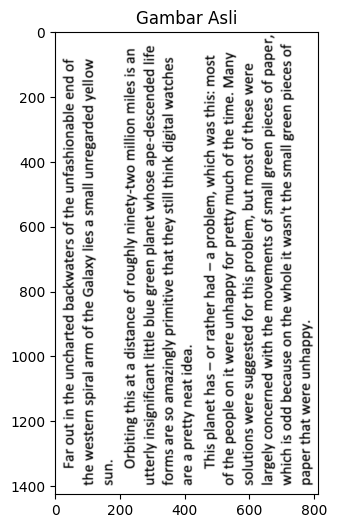

In [18]:
# Plot gambar original

# Membaca gambar dari direktori
image = cv2.imread(IMG_DIR + 'hitchhikers-rotated.png')

# Memisahkan saluran warna (blue, green, red) karena matplotlib menggunakan skema warna RGB
b, g, r = cv2.split(image)
rgb_img = cv2.merge([r, g, b])

# Menampilkan gambar dalam ukuran tertentu
plt.figure(figsize=(8, 6))
plt.imshow(rgb_img)
plt.title('Gambar Asli')
plt.show()



---

# **2. Deteksi Orientasi dan Skrip**


---



# **Mendeteksi Sudut Rotasi dan Jenis Skrip dengan Tesseract**

In [19]:
# Mendeteksi orientasi teks menggunakan Tesseract
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
osd_data = pytesseract.image_to_osd(gray_image)

# Menganalisis data skrip untuk mengekstrak orientasi dan jenis skrip
script_lines = osd_data.split('\n')
angle_line = [line for line in script_lines if 'Rotate' in line][0]
angle = int(angle_line.split(':')[-1].strip())

script_line = [line for line in script_lines if 'Script' in line][0]
script_type = script_line.split(':')[-1].strip()

# Menampilkan hasil orientasi dan jenis skrip
print(f'Sudut Rotasi (angle): {angle} derajat')
print(f'Jenis Skrip (script): {script_type}')

Sudut Rotasi (angle): 90 derajat
Jenis Skrip (script): Latin


# **Merotasi Gambar dan Menampilkan Gambar Hasil Rotasi**

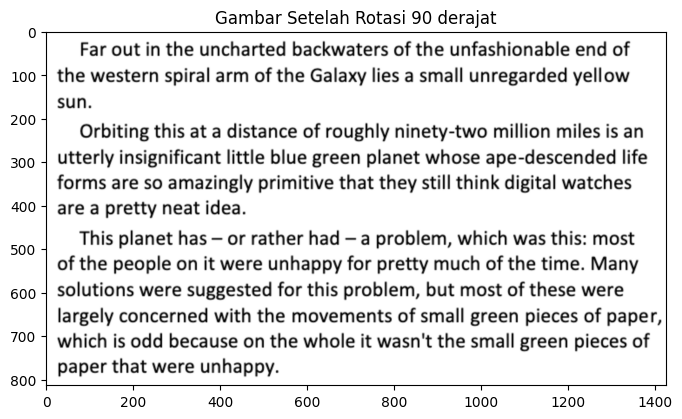

In [30]:
# Membaca gambar dari direktori
image = cv2.imread(IMG_DIR + 'hitchhikers-rotated.png')

# Rotasi gambar 90 derajat
rotated_image = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)

# Menampilkan gambar asli
plt.figure(figsize=(8, 6))
plt.imshow(rotated_image)
plt.title(f'Gambar Setelah Rotasi {angle} derajat' )
plt.show()

# **Bounding Box - Level Karakter**

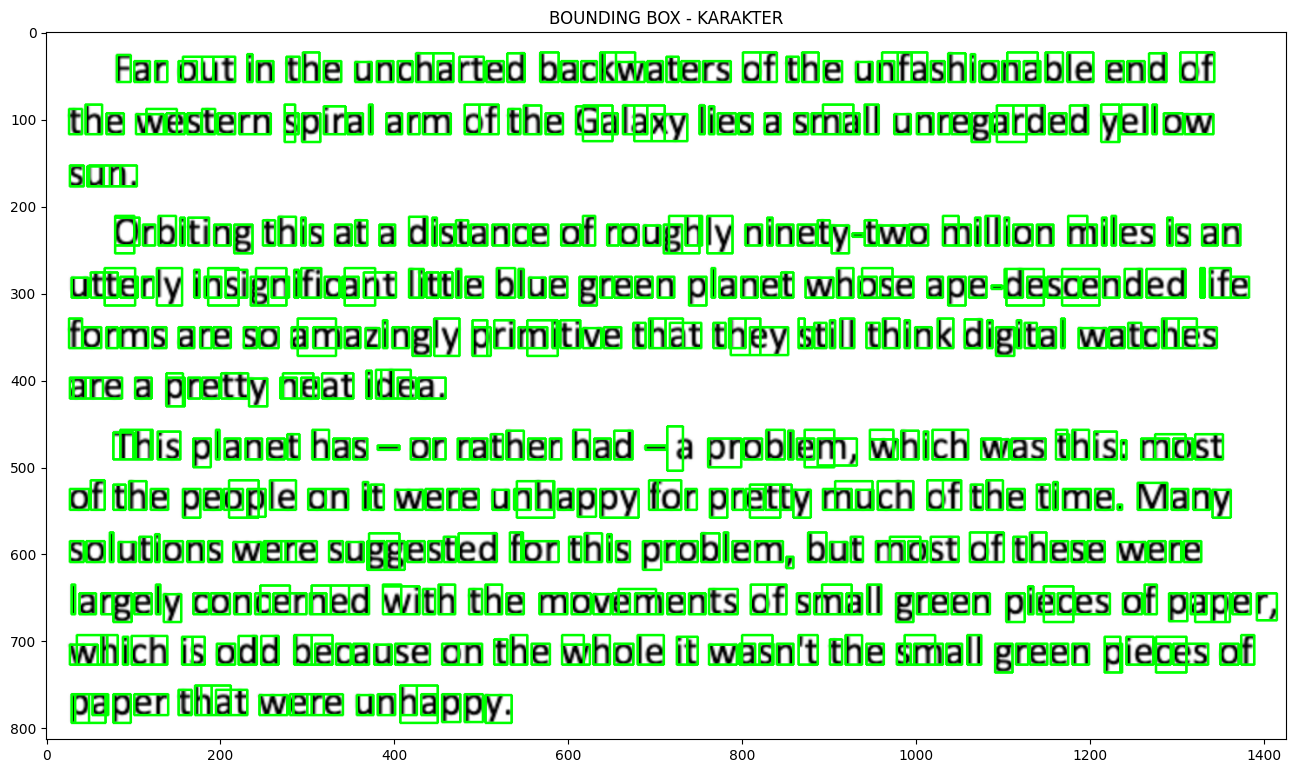

In [31]:
# Membaca gambar dari direktori
image = cv2.imread(IMG_DIR + 'hitchhikers-rotated.png')

# Rotasi gambar 90 derajat
rotated_image = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)

# Mendapatkan dimensi tinggi (h), lebar (w), dan channel warna (c) dari gambar
h, w, c = rotated_image.shape

# Menggunakan pytesseract.image_to_boxes() untuk mendapatkan informasi kotak karakter
boxes = pytesseract.image_to_boxes(rotated_image)

# Iterasi melalui setiap baris hasil dan membuat kotak pada gambar menggunakan OpenCV
for b in boxes.splitlines():
    b = b.split(' ')
    image = cv2.rectangle(rotated_image, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 2)

# Memisahkan channel warna untuk mengonversi dari BGR ke RGB
b, g, r = cv2.split(rotated_image)
rgb_img = cv2.merge([r, g, b])

# Menampilkan gambar dengan kotak karakter
plt.figure(figsize=(16, 12))
plt.imshow(rgb_img)
plt.title('BOUNDING BOX - KARAKTER')
plt.show()

# **Bounding Box - Level Kata**

In [28]:
# Membaca gambar dari direktori
image = cv2.imread(IMG_DIR + 'hitchhikers-rotated.png')

# Rotasi gambar 90 derajat
rotated_image = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)

# Menggunakan pytesseract.image_to_data() untuk mendapatkan data teks dari gambar
d = pytesseract.image_to_data(rotated_image, output_type=Output.DICT)

# Menampilkan kunci-kunci data yang diperoleh dari hasil OCR
print('DATA KEYS: \n', d.keys())

DATA KEYS: 
 dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


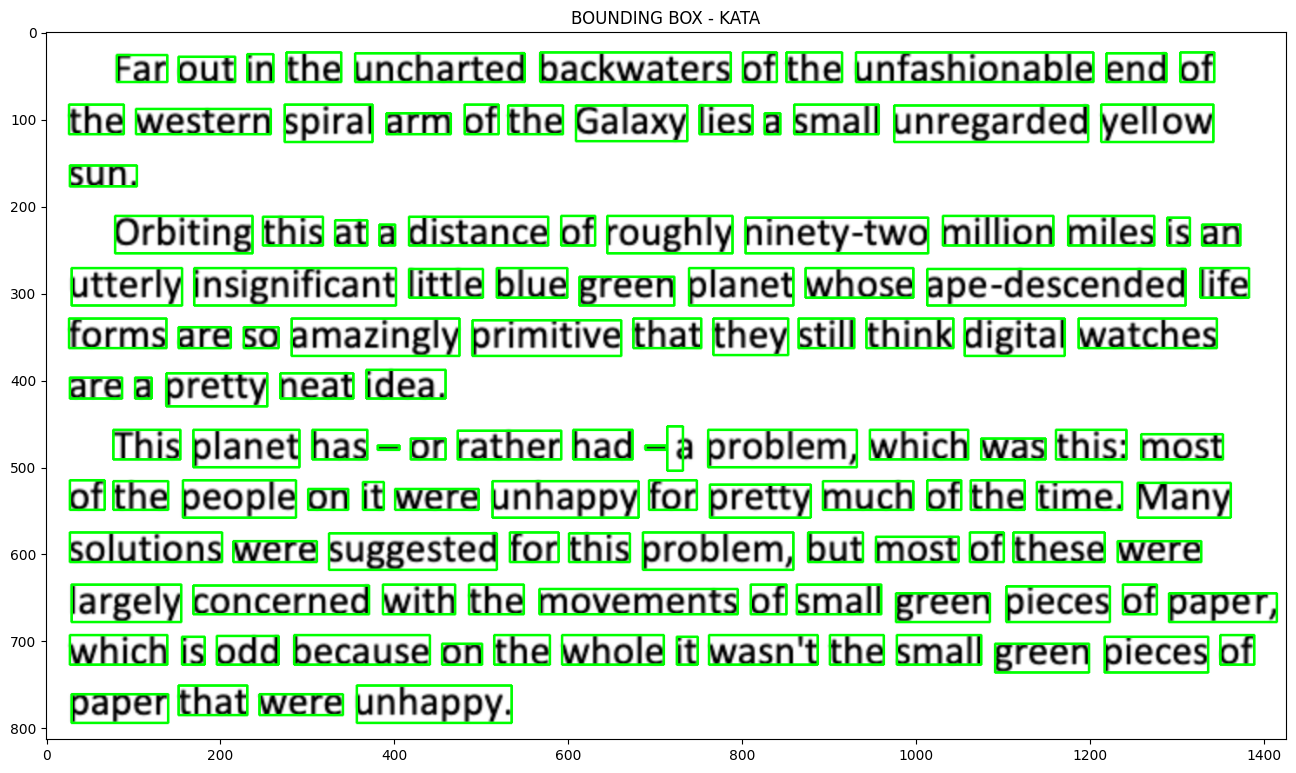

In [29]:
n_boxes = len(d['text'])
for i in range(n_boxes):
    # Kondisi untuk hanya memilih kotak dengan kepercayaan > 60%
    if int(d['conf'][i]) > 60:
        # Mendapatkan koordinat dan ukuran kotak kata
        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
        # Membuat kotak pada gambar untuk kata dengan kepercayaan > 60%
        image = cv2.rectangle(rotated_image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Memisahkan channel warna untuk mengonversi dari BGR ke RGB
b, g, r = cv2.split(image)
rgb_img = cv2.merge([r, g, b])

# Menampilkan gambar dengan kotak kata berdasarkan kepercayaan > 60%
plt.figure(figsize=(16, 12))
plt.imshow(rgb_img)
plt.title('BOUNDING BOX - KATA')
plt.show()

# **Text Template Matching - Pola Regex**

**Mencari kata terakhir pada sebuah kalimat**

In [32]:
# Membaca gambar dari direktori
image = cv2.imread(IMG_DIR + 'hitchhikers-rotated.png')

# Rotasi gambar 90 derajat
rotated_image = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)

# Pola untuk mencocokkan kalimat terakhir yang diakhiri dengan tanda "."
sentence_pattern = '.*\.$'

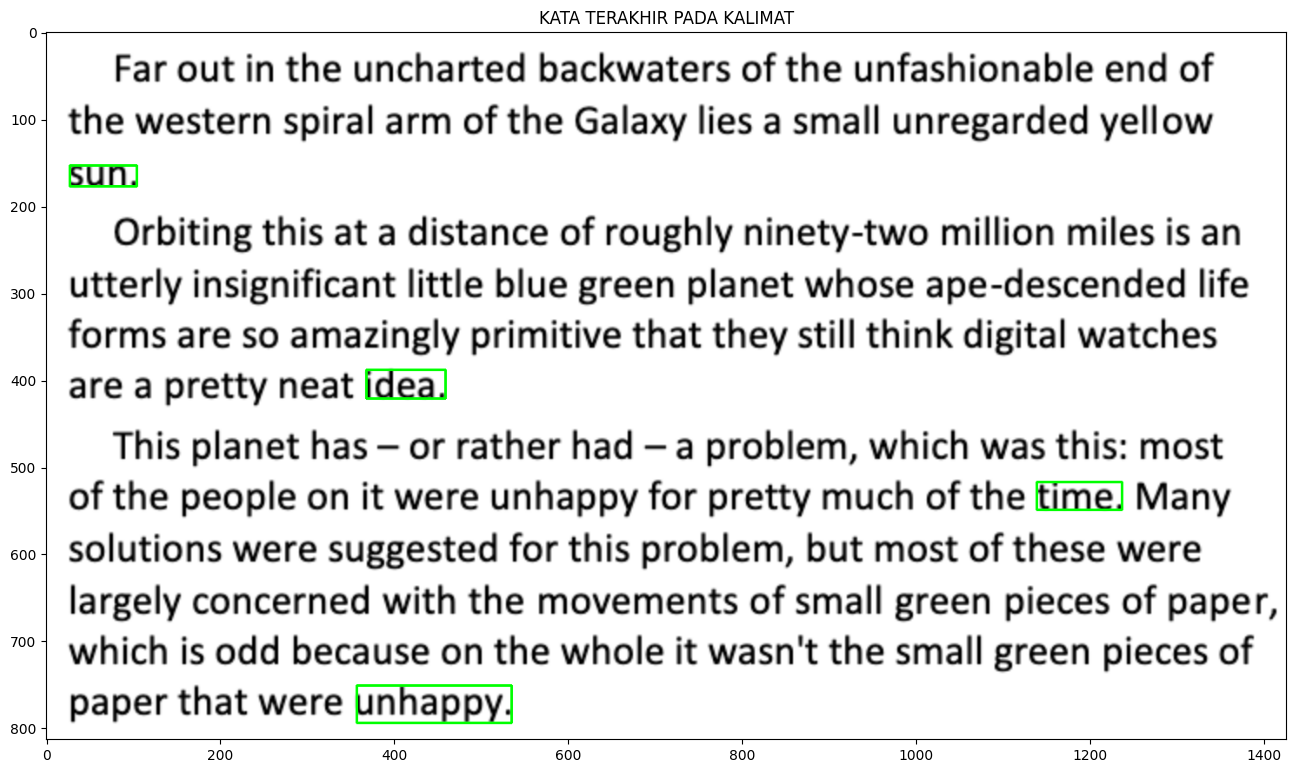

In [34]:
n_boxes = len(d['text'])
for i in range(n_boxes):
    # Memeriksa apakah kotak memiliki tingkat kepercayaan lebih dari 60%
    if int(d['conf'][i]) > 60:
        # Memeriksa apakah teks di dalam kotak sesuai dengan pola tanggal
        if re.match(sentence_pattern, d['text'][i]):
            # Mendapatkan koordinat dan ukuran kotak kata
            (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
            # Membuat kotak pada gambar untuk tanggal yang sesuai dengan pola
            image = cv2.rectangle(rotated_image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Memisahkan channel warna untuk mengonversi dari BGR ke RGB
b, g, r = cv2.split(rotated_image)
rgb_img = cv2.merge([r, g, b])

# Menampilkan gambar dengan kotak-kotak yang menandai lokasi tanggal
plt.figure(figsize=(16, 12))
plt.imshow(rgb_img)
plt.title('KATA TERAKHIR PADA KALIMAT')
plt.show()

# **Deteksi Berbagai Bahasa - OCR**

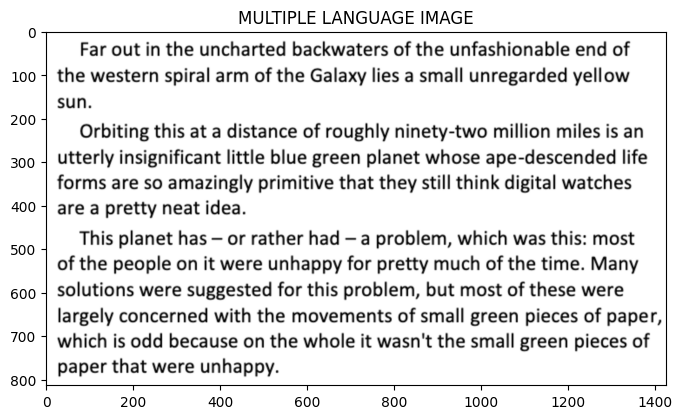

In [36]:
# Membaca gambar dari direktori
image = cv2.imread(IMG_DIR + 'hitchhikers-rotated.png')

# Rotasi gambar 90 derajat
rotated_image = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)

# Memisahkan channel warna untuk mengonversi dari BGR ke RGB
b, g, r = cv2.split(rotated_image)
rgb_img = cv2.merge([r, g, b])

# Menampilkan gambar asli
plt.figure(figsize=(8, 16))
plt.imshow(rgb_img, cmap='gray')
plt.title('MULTIPLE LANGUAGE IMAGE')
plt.show()

# **Mengekstrak Teks dari Gambar dengan Tesseract OCR**

In [37]:
# Output dengan hanya bahasa Inggris yang ditentukan

# Konfigurasi khusus dengan hanya bahasa Inggris yang diatur
custom_config = r'-l eng --oem 3 --psm 6'

# Menggunakan pytesseract.image_to_string() untuk mendapatkan teks dari gambar dengan konfigurasi khusus
print(pytesseract.image_to_string(rotated_image, config=custom_config))

Far out in the uncharted backwaters of the unfashionable end of
the western spiral arm of the Galaxy lies a small unregarded yellow
sun.

Orbiting this at a distance of roughly ninety-two million miles is an
utterly insignificant little blue green planet whose ape-descended life
forms are so amazingly primitive that they still think digital watches
are a pretty neat idea.

This planet has — or rather had — a problem, which was this: most
of the people on it were unhappy for pretty much of the time. Many
solutions were suggested for this problem, but most of these were
largely concerned with the movements of small green pieces of paper,
which is odd because on the whole it wasn't the small green pieces of
paper that were unhappy.

